Input size is (3, 64, 64)


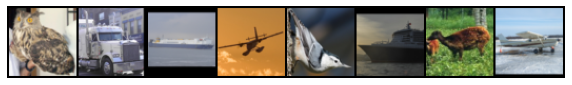

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.utils as vutils
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

img_size = 64
transform = transforms.Compose([transforms.Resize((img_size, img_size)),
                                transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
data = datasets.STL10(root='./data', split='test', transform=transform)
img_shape = (data[1][0].size(0), data[1][0].size(1), data[1][0].size(2))
print(f'Input size is {img_shape}')

# Prepare dataloader for training
batch_size = 32
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=4)

# Plot some training images
real_batch, _ = next(iter(dataloader))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(real_batch[:8], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [2]:
# SAGAN training
from SAGAN_pytorch import *

z_dim = 128
lr = 0.0001
cuda = torch.cuda.is_available()
device = torch.device("cuda:3" if cuda else "cpu")

# Initialize generator and discriminator
G = Generator(img_shape=img_shape, z_dim=z_dim, conv_dim=64).to(device)
D = Discriminator(img_shape=img_shape, dim=64).to(device)

optimizer_G = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.0, 0.99))
optimizer_D = torch.optim.Adam(D.parameters(), lr=lr, betas=(0.0, 0.99))

Train(epoch=300, dataloader=dataloader, device=device, z_dim=z_dim, G=G, D=D, 
      optimizer_G=optimizer_G, optimizer_D=optimizer_D, verbose=60)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 60 / D loss: -4.2231 / G loss: -3.2707
Epoch 120 / D loss: -6.2759 / G loss: 6.3882
Epoch 180 / D loss: -7.4493 / G loss: 13.0738
Epoch 240 / D loss: -8.1714 / G loss: 15.9414
Epoch 300 / D loss: -10.4807 / G loss: 16.0590
